# - Analysis

### The scatter plot provides us the best overview of the data set as it combines all elements and data points into ###one easy to understand plot.  What jumps out at us is that the number of urban rides by city far surpass the ###numbers from Suburban and Rural however at a lower fare by ride given the shorter ride duration of an urban ride.

###The bubble chart is supported by the pie charts which depict that the Total Rides by City and Total Fares by City which both show 68% and 62% shares respectively by the Urban drivers. 


###The Total Drivers pie shows us that the Urban market has a greater demand for ride sharing hence the 80% share drivers in comparison to the total.



In [5]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
#city_data_to_load = "data/city_data.csv"
#ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
city_data_to_load = pd.read_csv("data/city_data.csv")
ride_data_to_load = pd.read_csv("data/ride_data.csv")

# Combine the data into a single dataset

combined_citiride_data = pd.merge(city_data_to_load, ride_data_to_load, on="city")

# Display the data table for preview
combined_citiride_data.head()

,city,driver_count,type,date,fare,ride_id
0,Richardfort,38,Urban,2018-02-24 08:40:38,13.93,5628545007794
1,Richardfort,38,Urban,2018-02-13 12:46:07,14.00,910050116494
2,Richardfort,38,Urban,2018-02-16 13:52:19,17.92,820639054416
3,Richardfort,38,Urban,2018-02-01 20:18:28,10.26,9554935945413
4,Richardfort,38,Urban,2018-04-17 02:26:37,23.00,720020655850


In [7]:
#combined_citiride_data.describe()

combined_citiride_data2 = pd.DataFrame(combined_citiride_data)
combined_citiride_data2.head()


,city,driver_count,type,date,fare,ride_id
0,Richardfort,38,Urban,2018-02-24 08:40:38,13.93,5628545007794
1,Richardfort,38,Urban,2018-02-13 12:46:07,14.00,910050116494
2,Richardfort,38,Urban,2018-02-16 13:52:19,17.92,820639054416
3,Richardfort,38,Urban,2018-02-01 20:18:28,10.26,9554935945413
4,Richardfort,38,Urban,2018-04-17 02:26:37,23.00,720020655850


In [3]:
#DO NOT USE THIS

## Bubble Plot of Ride Sharing Data

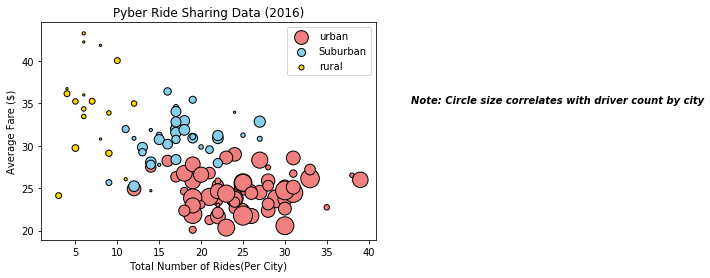

In [9]:
# Get the x and y coordinates for each of the three city types seperate by city type

rural_cities = combined_citiride_data[combined_citiride_data['type']=='Rural']
suburban_cities = combined_citiride_data[combined_citiride_data['type']=='Suburban']
urban_cities = combined_citiride_data[combined_citiride_data['type']=='Urban']

#need to get data points for each type of ride for ride count, fare and driver count

urban_ride_count = urban_cities.groupby(["city"]).count()["ride_id"]
urban_avg_fare = urban_cities.groupby(["city"]).mean()["fare"]
urban_driver_count = urban_cities.groupby(["city"]).mean()["driver_count"]

suburban_ride_count = suburban_cities.groupby(["city"]).count()["ride_id"]
suburban_avg_fare = suburban_cities.groupby(["city"]).mean()["fare"]
suburban_driver_count = suburban_cities.groupby(["city"]).mean()["driver_count"]

rural_ride_count = rural_cities.groupby(["city"]).count()["ride_id"]
rural_avg_fare = rural_cities.groupby(["city"]).mean()["fare"]
rural_driver_count = rural_cities.groupby(["city"]).mean()["driver_count"]

#plot three distinct bubble charts onto the one frame

plt.scatter(urban_ride_count, urban_avg_fare, s=5*urban_driver_count, c="lightcoral", edgecolor="black",label='urban')
plt.scatter(suburban_ride_count, suburban_avg_fare, s=5*suburban_driver_count, edgecolor="black", c="skyblue", label='Suburban')
plt.scatter(rural_ride_count, rural_avg_fare, s=5*rural_driver_count, edgecolor="black", c="gold", label='rural')

#Add text
plt.title("Pyber Ride Sharing Data (2016)")
plt.xlabel("Total Number of Rides(Per City)")
plt.ylabel("Average Fare ($)")
plt.text(45, 35, "Note: Circle size correlates with driver count by city", style='italic', size='medium', color='black', weight='semibold')

# Create a legend
lgnd = plt.legend(frameon = True, edgecolor = 'black')
lgnd.legendHandles[0]._sizes = [75]
lgnd.legendHandles[1]._sizes = [75]
lgnd.legendHandles[2]._sizes = [75]

# Save Figure
plt.legend()
#plt.figure(figsize=(12, 12), dpi=80)

plt.gcf()
# Save an image of our chart and print the final product to the screen
plt.savefig("Data/TotalRidesScatter.png", dpi=1000, bbox_inches="tight")


plt.show()



In [ ]:
#USE THIS

## Total Fares by City Type

In [10]:
fare_type = combined_citiride_data2.groupby('type')
count_fare_count = fare_type['ride_id'].count()
count_fare_count

type
Rural        125
Suburban     625
Urban       1625
Name: ride_id, dtype: int64

In [11]:
fare_type = combined_citiride_data2.groupby('type')
count_fare_count2 = fare_type['fare'].sum()
count_fare_count2

type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64

## Total Rides by City Type

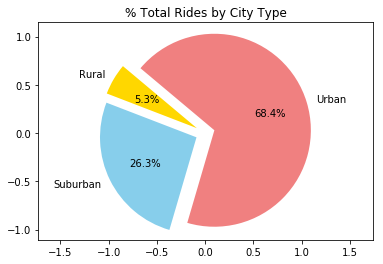

In [12]:
# Calculate Ride Percents  * % of Total Fares by City Type

fare_type = combined_citiride_data2.groupby('type')
fare_type
# Count how many times each maker appears in our group

count_fare_count = fare_type['ride_id'].count()

# Build Pie Chart

colors = ["gold","skyblue","lightcoral"]
explode = (.1, .1, .1)
names = ['Rural', 'Suburban', 'Urban']

plt.pie(count_fare_count, explode=explode, labels=names, colors=colors,
        autopct="%1.1f%%", shadow=False, startangle=140, frame=True)

plt.title("% Total Rides by City Type")

# Create axes which are equal so we have a perfect circle
plt.axis("equal")
# Save an image of our chart and print the final product to the screen
plt.savefig("Data/TotalRidesPyPies.png", dpi=1000)

# Save Figure
plt.show()

# Total Fares by City Type

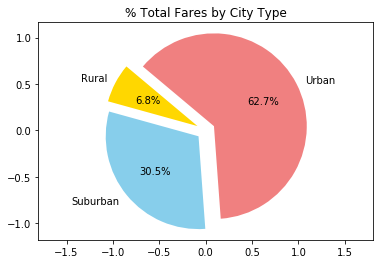

In [13]:
# USE THIS
fare_type2 = combined_citiride_data2.groupby('type')
fare_type2
# Count how many times each maker appears in our group

sum_fare_amt = fare_type2['fare'].sum()

# Build Pie Chart

colors = ["gold","skyblue","lightcoral"]
explode = (.1, .1, .1)
names = ['Rural', 'Suburban', 'Urban']

plt.pie(sum_fare_amt, explode=explode, labels=names, colors=colors,
        autopct="%1.1f%%", shadow=False, startangle=140, frame=True)

plt.title("% Total Fares by City Type")
# Create axes which are equal so we have a perfect circle
plt.axis("equal")
# Save an image of our chart and print the final product to the screen
plt.savefig("Data/TotalFaresPyPies.png", dpi=1000, bbox_inches="tight")

# Save Figure
plt.show()

# Total Drivers by City Type

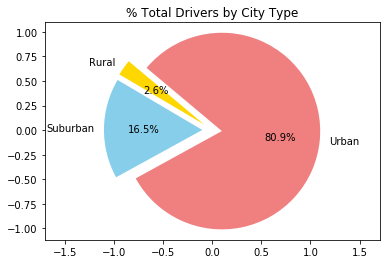

In [14]:
# Calculate Driver Percents
fare_type3 = city_data_to_load.groupby('type')
fare_type3
# Count how many times each maker appears in our group

driver_count = fare_type3['driver_count'].sum()

# Build Pie Chart

colors = ["gold","skyblue","lightcoral"]
explode = (.1, .1, .1)
names = ['Rural', 'Suburban', 'Urban']

plt.pie(driver_count, explode=explode, labels=names, colors=colors,
        autopct="%1.1f%%", shadow=False, startangle=140, frame=True)

plt.title("% Total Drivers by City Type")
# Create axes which are equal so we have a perfect circle
plt.axis("equal")
# Save an image of our chart and print the final product to the screen
plt.savefig("Data/TotalDriversPyPies.png", dpi=1000)

# Save Figure
plt.show()
# Build Pie Charts

# Save Figure


In [ ]:
# USE THIS